1 b)

In [37]:
import numpy as np
P = np.array([[.2, .7, .1],
              [.2, .5, .3],
              [.2, .4, .4]])

current_state = 0
num_steps = 1

for _ in range(num_steps):
    next_state = np.random.choice(range(len(P)), p=P[current_state])
    display_next_state = next_state+1
    display_current_state = current_state+1
    print(f"initial state: {display_current_state}, next state: {display_next_state}")
    current_state = next_state


initial state: 1, next state: 1
initial state: 1, next state: 1
initial state: 1, next state: 2
initial state: 2, next state: 3
initial state: 3, next state: 3
initial state: 3, next state: 1
initial state: 1, next state: 2
initial state: 2, next state: 2
initial state: 2, next state: 3
initial state: 3, next state: 2


2 a)

In [3]:
PT = np.transpose(P)


eigenvalues, eigenvectors = np.linalg.eig(PT)

# find the eigenvector corresponding to eigenvalue 1
stationary_vector = eigenvectors[:, np.where(np.isclose(eigenvalues, 1))[0][0]]

# normalize the stationary vector to make it a probability distribution
stationary_vector /= np.sum(stationary_vector)

print(stationary_vector)

Stationary Distribution:
[0.2        0.51111111 0.28888889]


2b)

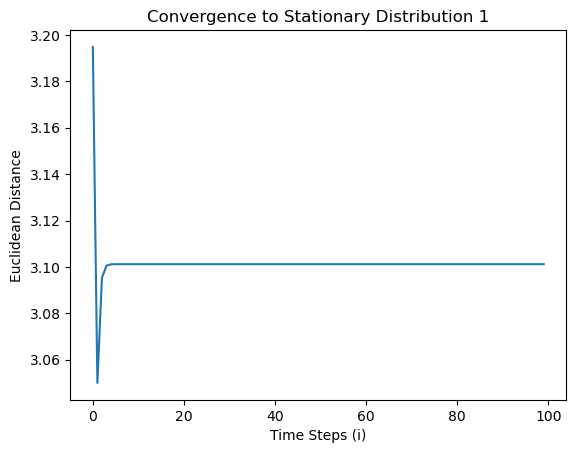

In [11]:
import matplotlib.pyplot as plt

# set initial values
pi0 = np.array([1, 2, 3]) 


num_steps = 100
distances = []
# calculate the stationary distribution
eigenvalues, eigenvectors = np.linalg.eig(PT)
stationary_vector = eigenvectors[:, np.where(np.isclose(eigenvalues, 1))[0][0]]
stationary_vector /= np.sum(stationary_vector)

# simulate the evolution of the probability distribution over time
for i in range(num_steps):
    pi_i = np.dot(pi0, np.linalg.matrix_power(P, i))
    
    # calculate euclidean distance between pi_i and stationary_vector
    distance = np.linalg.norm(pi_i - stationary_vector, ord=2)
    
    distances.append(distance)

# plot the results
plt.plot(range(num_steps), distances)
plt.xlabel('Time Steps (i)')
plt.ylabel('Euclidean Distance')
plt.title('Convergence to Stationary Distribution 1')
plt.show()


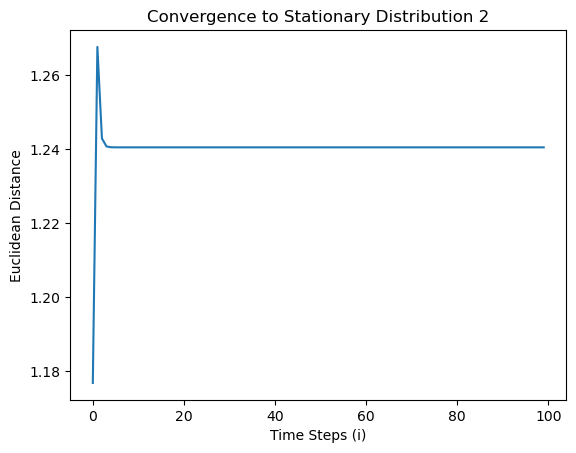

In [12]:
# set different initial values
pi0_2 = np.array([1, 1, 1]) 

distances = []
# simulate the evolution of the probability distribution over time for different initial values
for i in range(num_steps):
    pi_i = np.dot(pi0_2, np.linalg.matrix_power(P, i))
    distance = np.linalg.norm(pi_i - stationary_vector, ord=2)
    distances.append(distance)

# plot the results
plt.plot(range(num_steps), distances)
plt.xlabel('Time Steps (i)')
plt.ylabel('Euclidean Distance')
plt.title('Convergence to Stationary Distribution 2')
plt.show()

3 a)

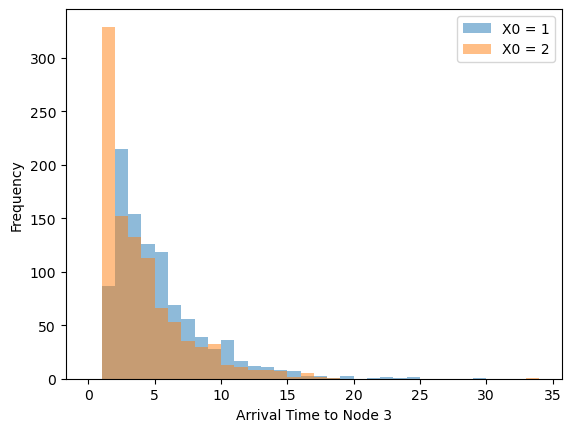

mean arrival ti me X0 = 1: 4.833
mean arrivial time X0 = 2: 3.647


In [39]:
def simulate_until_absorption(initial_state, transition_matrix, absorbing_state):
    current_state = initial_state
    time = 0
    while current_state != absorbing_state:
        current_state = np.random.choice(range(len(transition_matrix)), p=transition_matrix[current_state])
        time += 1
    return time

# define the absorbing state for node 3 (indexed 0,1,2)
absorbing_state = 2

num_simulations = 1000
arrival_times_X0_1 = []
arrival_times_X0_2 = []
# X0 = 1
for _ in range(num_simulations):
    arrival_time = simulate_until_absorption(0, P, absorbing_state)
    arrival_times_X0_1.append(arrival_time)
# X0 = 2
for _ in range(num_simulations):
    arrival_time = simulate_until_absorption(1, P, absorbing_state)
    arrival_times_X0_2.append(arrival_time)

# histograms
plt.hist(arrival_times_X0_1, bins=range(max(max(arrival_times_X0_1), max(arrival_times_X0_2)) + 1), alpha=0.5, label='X0 = 1')
plt.hist(arrival_times_X0_2, bins=range(max(max(arrival_times_X0_1), max(arrival_times_X0_2)) + 1), alpha=0.5, label='X0 = 2')
plt.xlabel('Arrival Time to Node 3')
plt.ylabel('Frequency')
plt.legend()
plt.show()

mean_arrival_time_X0_1 = np.mean(arrival_times_X0_1)
mean_arrival_time_X0_2 = np.mean(arrival_times_X0_2)
print(f'mean arrival ti me X0 = 1: {mean_arrival_time_X0_1}')
print(f'mean arrivial time X0 = 2: {mean_arrival_time_X0_2}')
